In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import random

In [2]:
#Import and clean Median Household Income By State
raw_hh_income_by_state = pd.read_excel('h08.xls')

start_row_index=0
end_row_index=0
max_year=0
for i in range(len(raw_hh_income_by_state)):
    if raw_hh_income_by_state.iloc[i,0]=='CURRENT DOLLARS':
        start_row_index=i+1
        max_year=int(raw_hh_income_by_state.iloc[i+1,1])
    if raw_hh_income_by_state.iloc[i,0]==str(max_year)+' DOLLARS':
        end_row_index=i-1

skiprow_list=list(range(start_row_index+1))
nrow_number=end_row_index-(start_row_index+1)
nrow_number

hh_income_by_state=pd.read_excel('h08.xls',skiprows=skiprow_list,nrows=nrow_number+1)

hh_header=list(hh_income_by_state.columns)
hh_first_row=list(hh_income_by_state.iloc[0,:])
for i in range(len(hh_header)):
    if hh_header[i]=='State':
        hh_header[i]=hh_header[i]
    else:
        if 'Unnamed' in str(hh_header[i]):
            hh_header[i]=old_header_value
        else:
            old_header_value=hh_header[i]
        
        hh_header[i]=str(hh_header[i])+' '+str(hh_first_row[i]).replace('\n',' ')

hh_income_by_state.columns=hh_header
hh_income_by_state=hh_income_by_state.drop(hh_income_by_state.index[0])

# hh_header

drop_list=[]
for i in hh_header:
    if 'Standard error' in i:
        drop_list.append(i)        

hh_income_by_state=hh_income_by_state.drop(columns=drop_list)
hh_income_by_state.columns=hh_income_by_state.columns.str.replace(' Median income','')

hh_header=list(hh_income_by_state.columns)
year_revised_dict={}
for i in hh_header:
    if '(' in i: 
        if str(i)[0:4] in year_revised_dict:
            if year_revised_dict[str(i)[0:4]]<str(i)[i.find('(')+1:i.find(')')]:
                year_revised_dict[str(i)[0:4]]=str(i)[i.find('(')+1:i.find(')')]
        else:
            year_revised_dict[str(i)[0:4]]=str(i)[i.find('(')+1:i.find(')')]

drop_list=[]
for i in hh_header:
    if str(i)[0:4] in year_revised_dict and str(i)[i.find('(')+1:i.find(')')]!=year_revised_dict[str(i)[0:4]]:
        drop_list.append(i) 

hh_income_by_state=hh_income_by_state.drop(columns=drop_list)

hh_header=list(hh_income_by_state.columns)
for i in range(len(hh_header)):
    if '(' in hh_header[i]:
        hh_header[i]=str(hh_header[i])[0:4]
hh_income_by_state.columns=hh_header
hh_income_by_state=hh_income_by_state.reset_index().drop(['index'], axis = 1)
hh_income_by_state

,State,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,United States,63179,61136,59039,56516,53657,53585,51017,50054,49276,...,31241,30636,30126,29943,28906,27225,26061,24897,23618,22415
1,Alabama,49936,50865,47221,44509,42278,47320,43464,42590,40933,...,25082,25808,24346,23357,21284,19948,19734,19132,18333,17310
2,Alaska,68734,77987,75723,75112,67629,72472,63648,57431,57848,...,42931,41802,40612,39298,36006,33103,33233,31356,34782,32356
3,Arizona,62283,59700,57100,52248,49254,52611,47044,48621,46896,...,30510,29358,30737,29224,28552,26435,26749,25500,23877,21425
4,Arkansas,49781,49751,45907,42798,44922,39376,39018,41302,38587,...,23039,23882,23435,22786,21433,20172,18827,18730,17451,15674
5,California,70489,70038,66637,63636,60487,60794,57020,53367,54283,...,34073,34903,33664,33290,33009,30287,30146,29010,26981,25287
6,Colorado,73034,74984,70566,66596,60940,67912,57255,58629,60233,...,34488,32484,31499,30733,26806,26214,26476,27192,28182,25801
7,Connecticut,72812,74304,75923,72889,70161,69291,64247,65415,65998,...,39516,40841,42154,38870,42321,36213,32862,32721,31090,29951
8,Delaware,65012,64961,58046,57756,57522,54091,48972,54660,55214,...,36064,35678,32585,30804,32068,30505,29244,25626,22980,25819
9,D.C.,85750,81282,70982,70071,68277,60057,65246,55251,56928,...,27304,30247,29885,27392,26752,26741,27455,24322,21076,20408


In [3]:
#Flip Household Income dataframe
hh_income_by_state_flipped = hh_income_by_state.transpose().reset_index()
hh_income_by_state_flipped.columns = hh_income_by_state_flipped.iloc[0]
hh_income_by_state_flipped = hh_income_by_state_flipped.rename({'State': 'Years'}, axis=1)
hh_income_by_state_flipped = hh_income_by_state_flipped[1:].iloc[::-1].reset_index().drop(['index'], axis = 1)
hh_income_by_state_flipped

,Years,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1984,22415,17310,32356,21425,15674,25287,25801,29951,25819,...,19409,16782,23024,23057,22578,26525,25017,16843,20743,23816
1,1985,23618,18333,34782,23877,17451,26981,28182,31090,22980,...,18142,17778,23743,25238,26000,28429,24000,15983,23246,22081
2,1986,24897,19132,31356,25500,18730,29010,27192,32721,25626,...,19898,18256,24162,26281,24599,29715,26881,16464,26430,23559
3,1987,26061,19734,33233,26749,18827,30146,26476,32862,29244,...,21151,21179,24721,26529,25415,29996,27319,17207,26369,27590
4,1988,27225,19948,33103,26435,20172,30287,26214,36213,30505,...,22294,20856,24963,26313,28988,32648,32327,19353,29575,26419
5,1989,28906,21284,36006,28552,21433,33009,26806,42321,32068,...,24108,22611,25886,30717,31295,34118,31961,21677,29123,29521
6,1990,29943,23357,39298,29224,22786,33290,30733,38870,30804,...,24571,22592,28228,30142,31098,35073,32112,22137,30711,29460
7,1991,30126,24346,40612,30737,23435,33664,31499,42154,32585,...,24639,24453,27733,28016,29155,36137,33970,23147,31133,29050
8,1992,30636,25808,41802,29358,23882,34903,32484,40841,35678,...,26259,24318,27953,34251,32755,38198,33900,20271,33308,30209
9,1993,31241,25082,42931,30510,23039,34073,34488,39516,36064,...,27737,25102,28727,35786,31065,36433,35655,22421,31766,29442


In [4]:
#Import and clean CPI data
raw_cpi_all=pd.read_csv('cu.data.1.AllItems.txt',sep='\t')
raw_cpi_medical=pd.read_csv('cu.data.15.USMedical.txt', sep='\t')

#raw data are in monthly format, so I transform it to yearly to make it compatible with the other data we have
cpi_all_yearly=raw_cpi_all.groupby('year').mean()
cpi_all_yearly=cpi_all_yearly.drop(['footnote_codes'],axis=1)
cpi_all_yearly=cpi_all_yearly.reset_index()
cpi_all_yearly.columns=cpi_all_yearly.columns.str.replace(' ','')
cpi_all_yearly.columns=['Years','CPI All items']

cpi_medical_yearly=raw_cpi_medical.groupby('year').mean()
cpi_medical_yearly=cpi_medical_yearly.drop(['footnote_codes'],axis=1)
cpi_medical_yearly=cpi_medical_yearly.reset_index()
cpi_medical_yearly.columns=cpi_medical_yearly.columns.str.replace(' ','')
cpi_medical_yearly.columns=['Years','CPI Medical']

cpi_merge=pd.merge(cpi_all_yearly,cpi_medical_yearly,how='inner', on='Years')
cpi_merge['CPI All items Growth']=cpi_merge['CPI All items'].pct_change()
cpi_merge['CPI Medical Growth']=cpi_merge['CPI Medical'].pct_change()
# print(cpi_all_yearly.columns)
# raw_cpi_all
cpi_merge

,Years,CPI All items,CPI Medical,CPI All items Growth,CPI Medical Growth
0,1935,26.982474,13.391667,NaN,NaN
1,1936,27.341727,12.368750,0.013314,-0.076385
2,1937,28.426695,12.928571,0.039682,0.045261
3,1938,27.861864,12.964286,-0.019870,0.002762
4,1939,27.530932,13.007143,-0.011878,0.003306
...,...,...,...,...,...
81,2016,371.734297,336.737765,0.013679,0.035303
82,2017,377.982001,346.200748,0.016807,0.028102
83,2018,351.180026,352.108846,-0.070908,0.017066
84,2019,361.239565,358.657237,0.028645,0.018598


In [5]:
selected_data_list=['Income before taxes','Health insurance']

avg_hh_income_and_expense_2013_2018=pd.read_excel('multiyr_2013_2018.xlsx',skiprows=[0,1],nrows=218).dropna(thresh = 2).reset_index().drop(['index'], axis = 1)
avg_hh_income_and_expense_2006_2012=pd.read_excel('multiyr_2006_2012.xls',skiprows=[0,1],nrows=216).dropna(thresh = 2).reset_index().drop(['index'], axis = 1)

In [6]:
selected_avg_hh_2013_2018=pd.DataFrame(columns = avg_hh_income_and_expense_2013_2018.columns)
selected_avg_hh_2006_2012=pd.DataFrame(columns = avg_hh_income_and_expense_2006_2012.columns)
for i in selected_data_list:
    pre_append1=avg_hh_income_and_expense_2013_2018[avg_hh_income_and_expense_2013_2018['Item'].str.contains(i)]
    pre_append2=avg_hh_income_and_expense_2006_2012[avg_hh_income_and_expense_2006_2012['Item'].str.contains(i)]
    selected_avg_hh_2013_2018=selected_avg_hh_2013_2018.append(pre_append1)
    selected_avg_hh_2006_2012=selected_avg_hh_2006_2012.append(pre_append2)
selected_avg_hh_2006_2012['Item']=selected_data_list
selected_avg_hh_2013_2018['Item']=selected_data_list

selected_avg_hh=pd.merge(selected_avg_hh_2006_2012,selected_avg_hh_2013_2018,how='inner',on='Item')
selected_avg_hh
# selected_avg_hh_2013_2018

,Item,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Income before taxes,60533,63091,63563.0,62857.0,62481.0,63685,65596,63784,66877,69627,74664,73573,78635
1,Health insurance,1465,1545,1653.0,1785.0,1831.0,1922,2061,2229,2868,2977,3160,3414,3405


In [7]:
selected_avg_hh_flipped = selected_avg_hh.transpose().reset_index()
selected_avg_hh_flipped.columns = selected_avg_hh_flipped.iloc[0]
selected_avg_hh_flipped = selected_avg_hh_flipped.rename({'Item': 'Years'}, axis=1)
selected_avg_hh_flipped = selected_avg_hh_flipped[1:].iloc[::-1].reset_index().drop(['index'], axis = 1)

for i in selected_avg_hh_flipped.columns:
    selected_avg_hh_flipped[i+' Growth']=selected_avg_hh_flipped[i].pct_change(-1)

selected_avg_hh_flipped=selected_avg_hh_flipped.drop(['Years Growth'],axis=1)
selected_avg_hh_flipped

,Years,Income before taxes,Health insurance,Income before taxes Growth,Health insurance Growth
0,2018,78635,3405,0.068802,-0.002636
1,2017,73573,3414,-0.014612,0.080380
2,2016,74664,3160,0.072343,0.061471
3,2015,69627,2977,0.041120,0.038006
4,2014,66877,2868,0.048492,0.286676
5,2013,63784,2229,-0.027624,0.081514
6,2012,65596,2061,0.030007,0.072320
7,2011,63685,1922,0.019270,0.049700
8,2010,62481,1831,-0.005982,0.025770
9,2009,62857,1785,-0.011107,0.079855


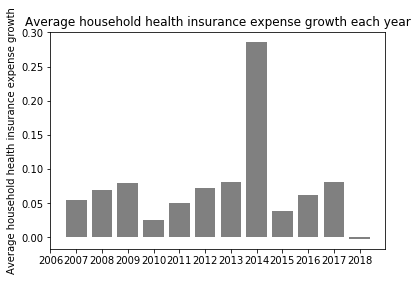

In [23]:
selected_avg_hh_flipped=selected_avg_hh_flipped.sort_values(by=['Years'])
objects = selected_avg_hh_flipped['Years']
y_pos = np.arange(len(objects))
performance = selected_avg_hh_flipped['Health insurance Growth']

plt.bar(y_pos, performance, color='Grey')
plt.xticks(y_pos, objects)
plt.ylabel('Average household health insurance expense growth')
plt.title('Average household health insurance expense growth each year')

plt.show()
# plt.plot('Years', 'Health insurance Growth', data=selected_avg_hh_flipped, marker='*', color='#4832a8', linewidth=5)